# EE257 Final Project
# Data Set - G: Gas Sensor Array Under Flow Modulation
# By Hongru Han & Yiran Xu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
import pydot
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import cross_val_predict,KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score,mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn import neighbors
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrix
from sklearn.preprocessing import scale

from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
rawdata = pd.read_csv("rawdata.csv")

In [3]:
rawdata.head()

,sensor,sample,exp,batch,ace_conc,eth_conc,gas,lab,col,dR_t1,...,dR_t7491,dR_t7492,dR_t7493,dR_t7494,dR_t7495,dR_t7496,dR_t7497,dR_t7498,dR_t7499,dR_t7500
0,1,1,100,day-1-morning,0.0,0.0,air,air,252525,0,...,-0.00402,-0.00402,-0.00402,-0.00416,-0.00416,-0.00416,-0.00416,-0.00389,-0.00389,-0.00389
1,2,1,100,day-1-morning,0.0,0.0,air,air,252525,0,...,-0.00434,-0.00434,-0.00434,-0.00422,-0.00422,-0.00422,-0.00422,-0.00392,-0.00392,-0.00392
2,3,1,100,day-1-morning,0.0,0.0,air,air,252525,0,...,-0.00027,-0.00027,-0.00027,-0.00027,-0.00027,-0.00027,-0.00027,-0.00013,-0.00013,-0.00013
3,4,1,100,day-1-morning,0.0,0.0,air,air,252525,0,...,-0.00131,-0.00131,-0.00131,-0.00137,-0.00137,-0.00137,-0.00137,-0.00131,-0.00131,-0.00131
4,5,1,100,day-1-morning,0.0,0.0,air,air,252525,0,...,-0.00362,-0.00362,-0.00362,-0.00326,-0.00326,-0.00326,-0.00326,-0.00355,-0.00355,-0.00355


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Columns: 7509 entries, sensor to dR_t7500
dtypes: float64(7501), int64(4), object(4)
memory usage: 53.2+ MB


In [5]:
rawdata["lab"].value_counts()

air                128
eth-0.1             96
ace-0.3             96
ace-0.1             96
eth-1               80
ace-0.3-eth-0.1     80
ace-0.1-eth-0.3     80
eth-0.3             64
ace-0.1-eth-0.1     64
ace-0.1-eth-1       48
ace-1-eth-0.1       48
ace-1               48
Name: lab, dtype: int64

In [6]:
rawdata.describe()

,sensor,sample,exp,ace_conc,eth_conc,dR_t1,dR_t2,dR_t3,dR_t4,dR_t5,...,dR_t7491,dR_t7492,dR_t7493,dR_t7494,dR_t7495,dR_t7496,dR_t7497,dR_t7498,dR_t7499,dR_t7500
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.0,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,8.500000,29.500000,138.034483,0.191379,0.215517,0.0,-0.000003,-0.000005,-0.000008,-0.000016,...,0.208811,0.208722,0.208622,0.208509,0.208419,0.208354,0.208242,0.208123,0.208064,0.207994
std,4.612258,16.749696,22.802915,0.295108,0.329650,0.0,0.000086,0.000102,0.000154,0.000259,...,0.249967,0.249916,0.249836,0.249663,0.249589,0.249559,0.249461,0.249290,0.249254,0.249226
min,1.000000,1.000000,100.000000,0.000000,0.000000,0.0,-0.000690,-0.000770,-0.000770,-0.001140,...,-0.150400,-0.150400,-0.150400,-0.150400,-0.150280,-0.150280,-0.150280,-0.150280,-0.150100,-0.150100
25%,4.750000,15.000000,120.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.000170,...,0.038348,0.038323,0.038323,0.038352,0.038262,0.038100,0.038073,0.038073,0.038073,0.037940
50%,8.500000,29.500000,138.500000,0.100000,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.132070,0.132070,0.132070,0.132070,0.131610,0.131610,0.131610,0.131610,0.131385,0.131415
75%,12.250000,44.000000,157.000000,0.300000,0.300000,0.0,0.000000,0.000000,0.000000,0.000130,...,0.303390,0.303390,0.303028,0.302665,0.302665,0.302665,0.302560,0.302310,0.302310,0.302123
max,16.000000,58.000000,181.000000,1.000000,1.000000,0.0,0.000610,0.000700,0.000840,0.001020,...,1.762650,1.762650,1.762650,1.758020,1.758020,1.758020,1.758020,1.754840,1.754840,1.754840


Read different gas class data and visualize them

In [7]:
x_1 = rawdata.loc[0:15,'dR_t1':'dR_t7500']
y_1 = np.linspace(1, 7500, 7500)
x_1 = x_1.values
x_1 = x_1.T

In [8]:
x_2 = rawdata.loc[16:31,'dR_t1':'dR_t7500']
x_2 = x_2.values
x_2 = x_2.T

In [9]:
x_3 = rawdata.loc[32:47,'dR_t1':'dR_t7500']
x_3 = x_3.values
x_3 = x_3.T

In [10]:
x_4 = rawdata.loc[48:63,'dR_t1':'dR_t7500']
x_4 = x_4.values
x_4 = x_4.T

In [11]:
x_5 = rawdata.loc[64:79,'dR_t1':'dR_t7500']
x_5 = x_5.values
x_5 = x_5.T

In [12]:
x_6 = rawdata.loc[80:95,'dR_t1':'dR_t7500']
x_6 = x_6.values
x_6 = x_6.T

In [13]:
x_7 = rawdata.loc[96:111,'dR_t1':'dR_t7500']
x_7 = x_7.values
x_7 = x_7.T

In [14]:
x_8 = rawdata.loc[112:127,'dR_t1':'dR_t7500']
x_8 = x_8.values
x_8 = x_8.T

In [15]:
x_9 = rawdata.loc[192:207,'dR_t1':'dR_t7500']
x_9 = x_9.values
x_9 = x_9.T

In [16]:
x_10 = rawdata.loc[576:591,'dR_t1':'dR_t7500']
x_10 = x_10.values
x_10 = x_10.T

In [17]:
x_11 = rawdata.loc[720:735,'dR_t1':'dR_t7500']
x_11 = x_11.values
x_11 = x_11.T

In [18]:
x_12 = rawdata.loc[752:767,'dR_t1':'dR_t7500']
x_12 = x_12.values
x_12 = x_12.T

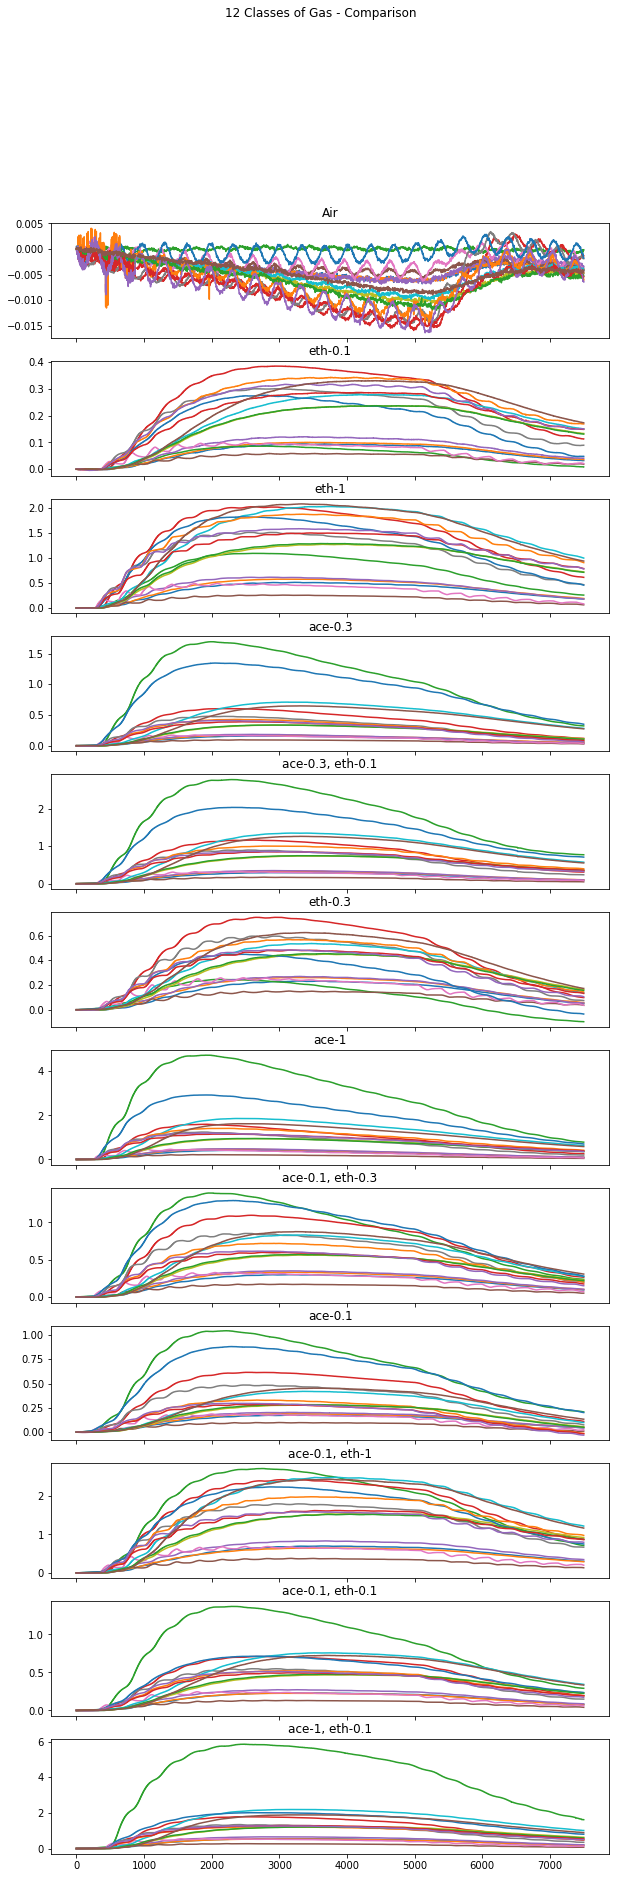

In [19]:
f, axarr = plt.subplots(12, sharex=True,figsize=(10,30))
f.suptitle('12 Classes of Gas - Comparison')
axarr[0].plot(y_1,x_1)
axarr[1].plot(y_1,x_2)
axarr[2].plot(y_1,x_3)
axarr[3].plot(y_1,x_4)
axarr[4].plot(y_1,x_5)
axarr[5].plot(y_1,x_6)
axarr[6].plot(y_1,x_7)
axarr[7].plot(y_1,x_8)
axarr[8].plot(y_1,x_9)
axarr[9].plot(y_1,x_10)
axarr[10].plot(y_1,x_11)
axarr[11].plot(y_1,x_12)

axarr[0].set_title('Air');
axarr[1].set_title('eth-0.1');
axarr[2].set_title('eth-1');
axarr[3].set_title('ace-0.3');
axarr[4].set_title('ace-0.3, eth-0.1');
axarr[5].set_title('eth-0.3');
axarr[6].set_title('ace-1');
axarr[7].set_title('ace-0.1, eth-0.3');
axarr[8].set_title('ace-0.1');
axarr[9].set_title('ace-0.1, eth-1');
axarr[10].set_title('ace-0.1, eth-0.1');
axarr[11].set_title('ace-1, eth-0.1');

Air data is sensor static noise, the other readings have a filped U shape. We will take the center part of the data as our input

In [20]:
sample_1 = rawdata.loc[16:31, 'dR_t1':'dR_t7500']

In [21]:
sample_1 = sample_1.T;

Clean data with IQR method

In [22]:
Q1 = sample_1.quantile(0.25)
Q3 = sample_1.quantile(0.75)
IQR = Q3 - Q1
mask = (sample_1 < (Q1 - 1.5 * IQR)) | (sample_1 > (Q3 + 1.5 * IQR))
Q2 = sample_1.median()
sample_1[mask] = np.nan
sample_1.head()

,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
dR_t1,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t2,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t3,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t4,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t5,0.0,-0.00012,-0.00007,-0.00012,-0.00015,-0.0004,0.00025,-0.00011,0.0002,-0.00007,-0.00024,-0.0002,-0.00035,0.00021,0.00005,0.00014


In [23]:
sample_1.fillna(Q2,inplace = True)
sample_1.head()

,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
dR_t1,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t2,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t3,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t4,0.0,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
dR_t5,0.0,-0.00012,-0.00007,-0.00012,-0.00015,-0.0004,0.00025,-0.00011,0.0002,-0.00007,-0.00024,-0.0002,-0.00035,0.00021,0.00005,0.00014


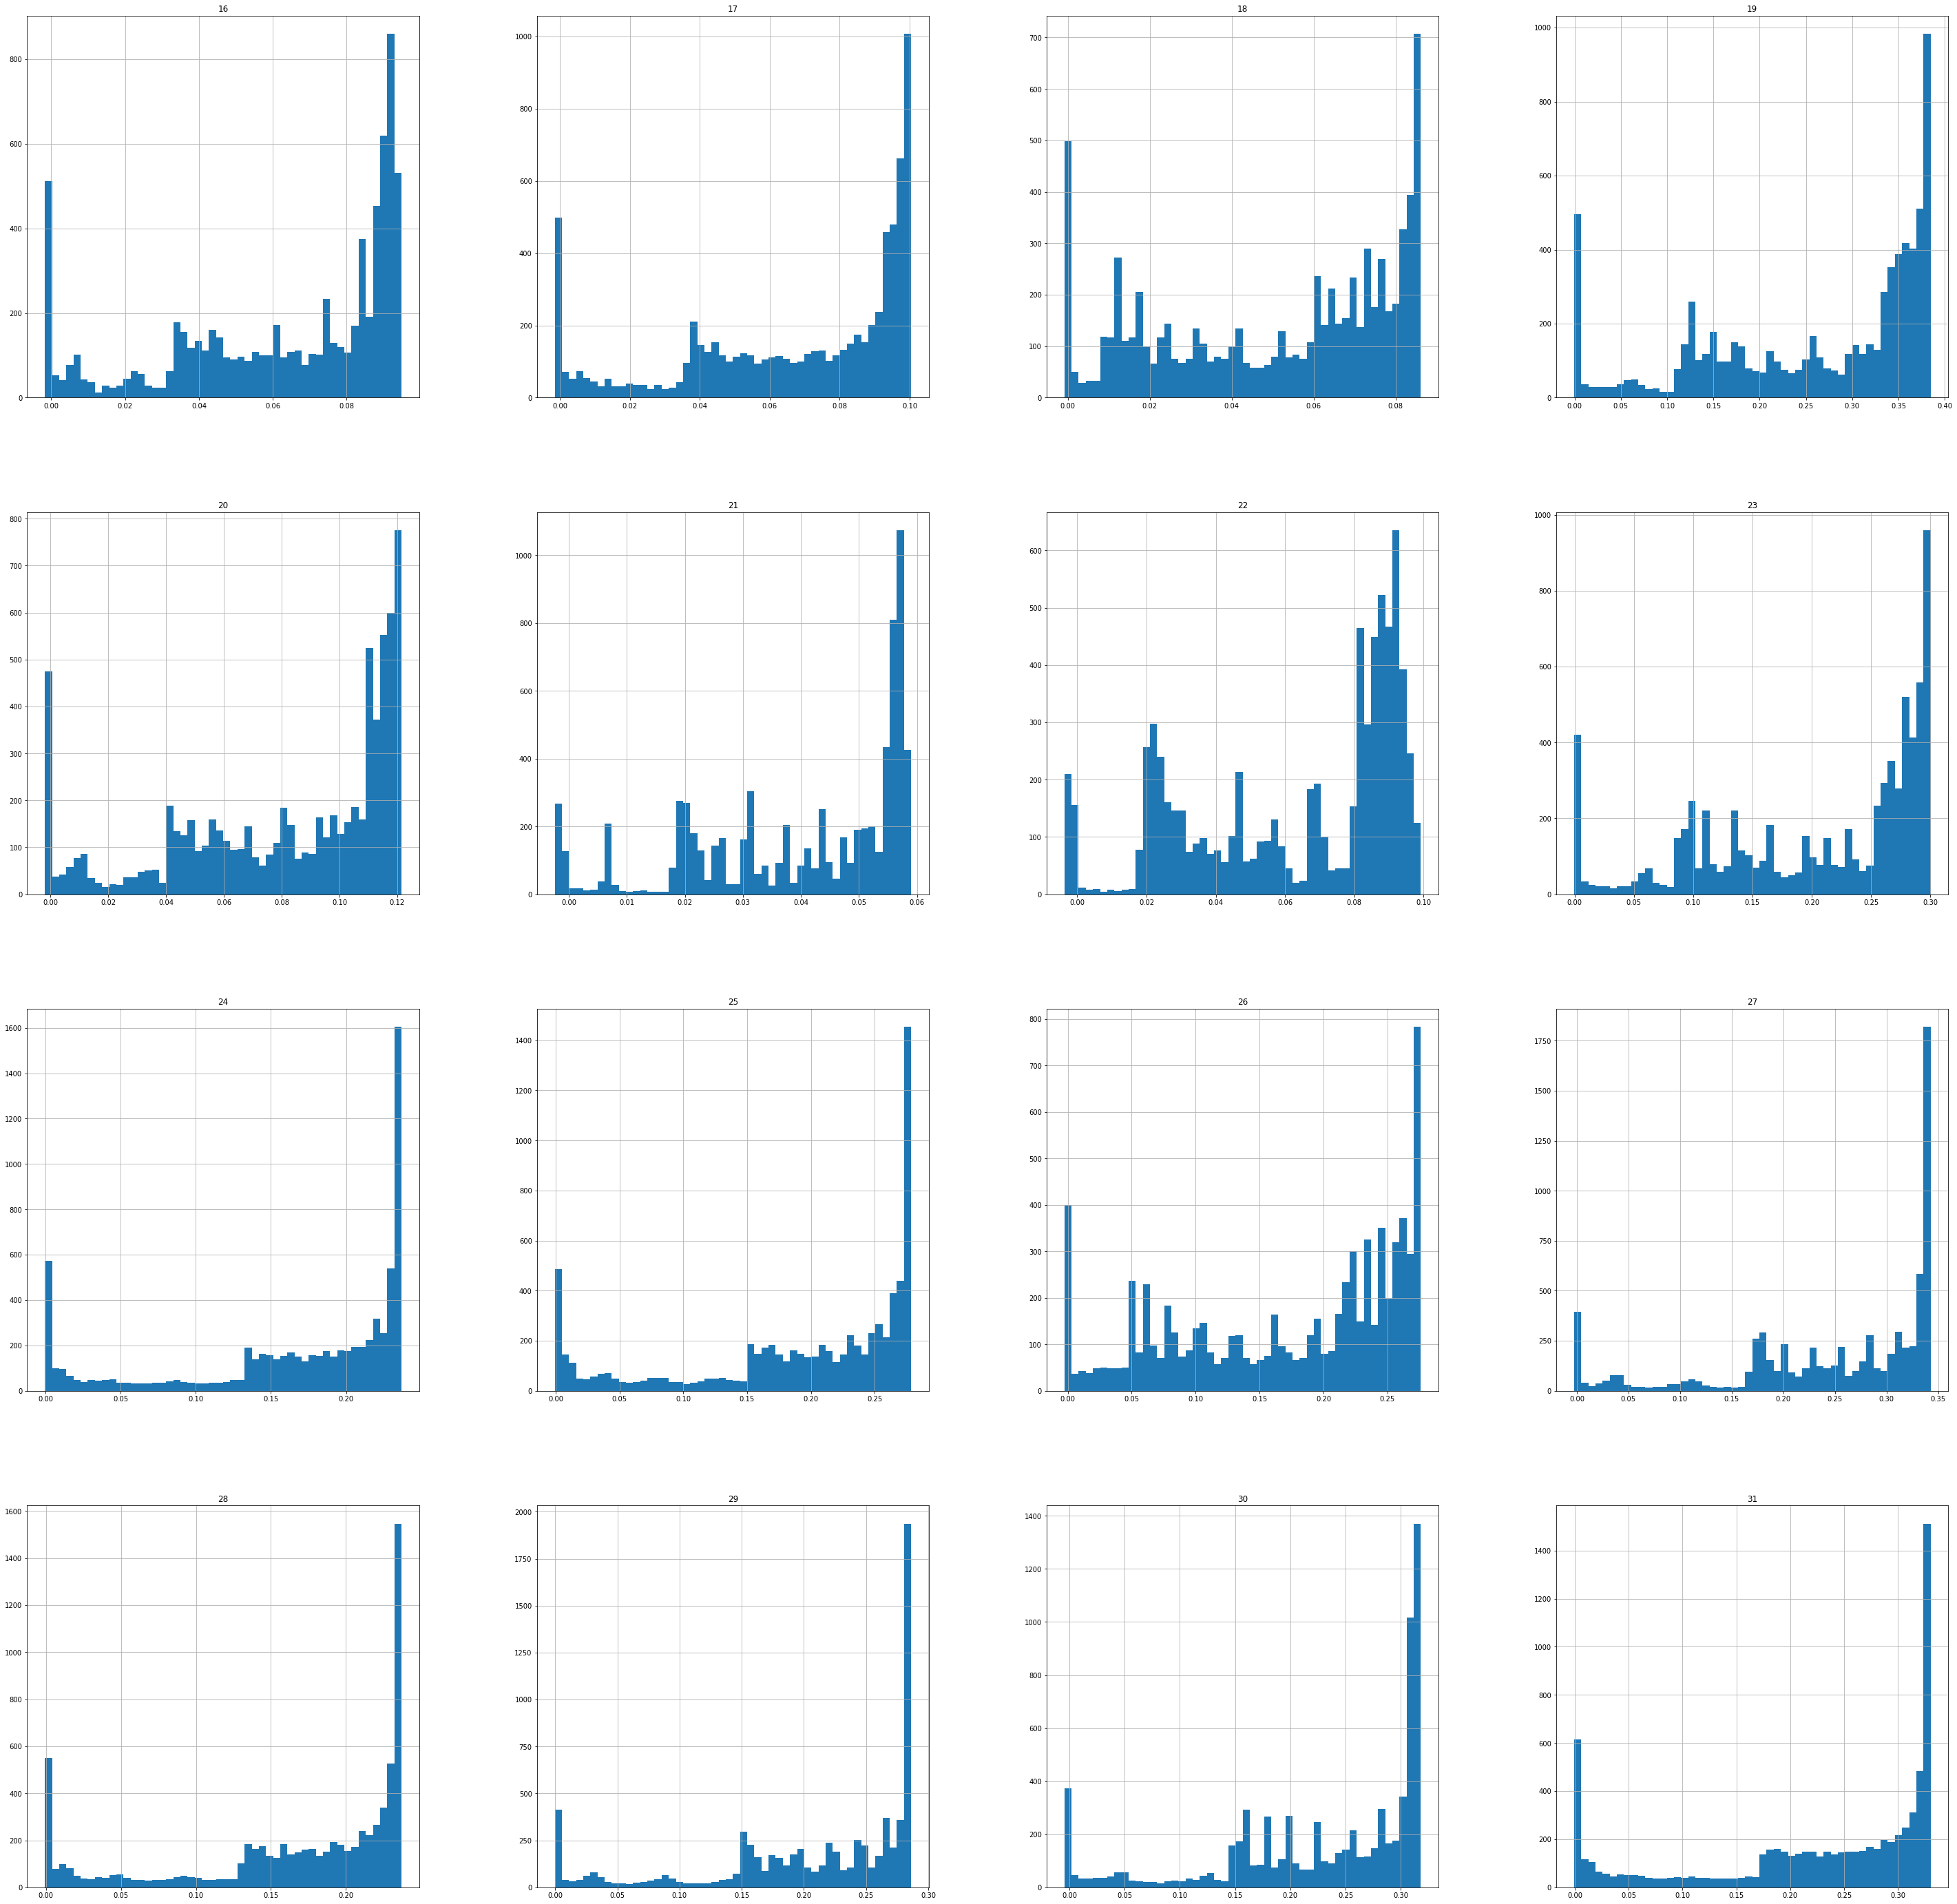

In [24]:
sample_1.hist(bins = 50, figsize = (50,50));

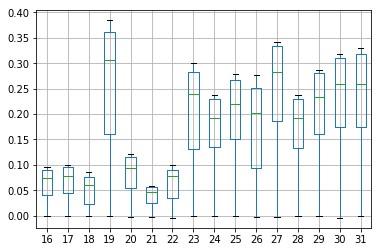

In [25]:
sample_1.boxplot();

median values are much closer to the actual readings, thus we will take the median of the cleaned time series data. 

In [26]:
sample = dict()
for i in range(1,59):
    df = rawdata.loc[0+(i-1)*16:15+(i-1)*16, 'dR_t2000':'dR_t5000']
    df = df.T
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    Q2 = df.median()
    df[mask] = np.nan
    df.fillna(Q2,inplace = True)
    sample[i]= df.median()
    print(sample[i])

0    -0.00496
1    -0.00501
2     0.00014
3    -0.01115
4    -0.00518
5    -0.00403
6    -0.00351
7    -0.01070
8    -0.00722
9    -0.00656
10   -0.00124
11   -0.00891
12   -0.00756
13   -0.01055
14   -0.01020
15   -0.00573
dtype: float64
16    0.09065
17    0.09705
18    0.08028
19    0.36909
20    0.11609
21    0.05655
22    0.08989
23    0.28845
24    0.22948
25    0.26933
26    0.25783
27    0.33725
28    0.22912
29    0.28227
30    0.31071
31    0.32001
dtype: float64
32    0.49140
33    0.55602
34    1.04731
35    1.94514
36    0.59456
37    0.24677
38    0.44350
39    1.45628
40    1.24420
41    1.97640
42    1.71870
43    1.82975
44    1.26106
45    1.47038
46    1.54872
47    2.02047
dtype: float64
48    0.14897
49    0.16397
50    1.41251
51    0.53573
52    0.17043
53    0.08986
54    0.14557
55    0.41419
56    0.32109
57    0.67576
58    1.18088
59    0.38818
60    0.32261
61    0.36250
62    0.36114
63    0.61682
dtype: float64
64    0.28416
65    0.32127
66    2.46322
67

dtype: float64
544    0.20683
545    0.20410
546    2.07351
547    0.74169
548    0.24473
549    0.11292
550    0.20108
551    0.57054
552    0.50323
553    0.99046
554    1.22869
555    0.65148
556    0.50787
557    0.56400
558    0.57057
559    0.87492
dtype: float64
560    0.28707
561    0.27705
562    2.43513
563    1.04979
564    0.34208
565    0.14462
566    0.27376
567    0.80753
568    0.72541
569    1.32054
570    1.43572
571    0.94487
572    0.72630
573    0.79316
574    0.81491
575    1.19044
dtype: float64
576    0.67736
577    0.63051
578    2.58110
579    2.33891
580    0.80876
581    0.36043
582    0.64213
583    1.74145
584    1.51027
585    2.41997
586    2.15245
587    1.94179
588    1.49729
589    1.59943
590    1.56063
591    2.37533
dtype: float64
592    0.07011
593    0.07081
594    0.75829
595    0.13230
596    0.07819
597    0.05181
598    0.07285
599    0.10547
600    0.12239
601    0.23667
602    0.40764
603    0.13095
604    0.11717
605    0.11745
606    0.1

In [27]:
target = pd.DataFrame(sample)
target

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,-0.00496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.00501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.01115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.00518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.00403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.00351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.01070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.00722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.00656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is in wrong format, we need to read the value row by row, and drop NaN, then reshape it into 58 * 16

In [28]:
# read target values
target1 = target.values

# drop NaN value
target1 = target1[~np.isnan(target1)]

# reshape into 58*16
target2 = target1.reshape(58,16)

In [29]:
# put the above arrat into a dataframe
output = pd.DataFrame(target2)

In [30]:
# name the dataframe columns
output.columns = ['Sensor_1','Sensor_2','Sensor_3','Sensor_4','Sensor_5','Sensor_6','Sensor_7','Sensor_8','Sensor_9','Sensor_10','Sensor_11','Sensor_12','Sensor_13','Sensor_14','Sensor_15','Sensor_16']

Cleaned data

In [31]:
output.head(2)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
0,-0.00496,-0.00501,0.00014,-0.01115,-0.00518,-0.00403,-0.00351,-0.01070,-0.00722,-0.00656,-0.00124,-0.00891,-0.00756,-0.01055,-0.01020,-0.00573
1,0.09065,0.09705,0.08028,0.36909,0.11609,0.05655,0.08989,0.28845,0.22948,0.26933,0.25783,0.33725,0.22912,0.28227,0.31071,0.32001


In [32]:
output.shape

(58, 16)

Then we need to add the response of the input, i.e. gas classes, we do this by putting them into dictionary using a for loop. As following

In [33]:
lab = dict()
for i in range(0,58):
    df_lab = rawdata.loc[0+i*16, 'lab']
    lab[i]= df_lab
    print(lab[i])

air
eth-0.1
eth-1
ace-0.3
ace-0.3-eth-0.1
eth-0.3
ace-1
ace-0.1-eth-0.3
ace-0.1
ace-0.3
air
eth-0.1
ace-0.1-eth-0.1
eth-0.3
ace-0.3-eth-0.1
ace-0.3
ace-0.1
eth-1
air
air
ace-0.1-eth-0.3
ace-0.1
eth-0.3
eth-0.1
ace-0.3-eth-0.1
ace-0.1-eth-0.1
eth-1
ace-1
air
air
air
eth-0.1
ace-0.1-eth-0.3
ace-0.1-eth-0.1
ace-0.3
ace-0.3-eth-0.1
ace-0.1-eth-1
ace-0.1
eth-1
air
ace-0.1
eth-0.3
ace-0.3-eth-0.1
ace-0.1-eth-0.3
eth-0.1
ace-0.1-eth-0.1
ace-0.3
ace-1-eth-0.1
eth-1
ace-1
ace-0.3
eth-0.1
ace-0.1-eth-0.3
ace-0.1
ace-1-eth-0.1
ace-1-eth-0.1
ace-0.1-eth-1
ace-0.1-eth-1


In [34]:
gas = pd.DataFrame.from_dict(lab,orient='index',columns=['gas_class'])
gas.shape

(58, 1)

Dataframe with both input (Sensor_1 to Sensor_16) and output (gas_label)

In [35]:
output['gas_class'] = gas.gas_class
output['gas_label'] = gas.gas_class.factorize()[0]
output.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,gas_class,gas_label
0,-0.00496,-0.00501,0.00014,-0.01115,-0.00518,-0.00403,-0.00351,-0.01070,-0.00722,-0.00656,-0.00124,-0.00891,-0.00756,-0.01055,-0.01020,-0.00573,air,0
1,0.09065,0.09705,0.08028,0.36909,0.11609,0.05655,0.08989,0.28845,0.22948,0.26933,0.25783,0.33725,0.22912,0.28227,0.31071,0.32001,eth-0.1,1
2,0.49140,0.55602,1.04731,1.94514,0.59456,0.24677,0.44350,1.45628,1.24420,1.97640,1.71870,1.82975,1.26106,1.47038,1.54872,2.02047,eth-1,2
3,0.14897,0.16397,1.41251,0.53573,0.17043,0.08986,0.14557,0.41419,0.32109,0.67576,1.18088,0.38818,0.32261,0.36250,0.36114,0.61682,ace-0.3,3
4,0.28416,0.32127,2.46322,1.09394,0.33277,0.16459,0.29007,0.83553,0.71973,1.29176,1.86560,0.96558,0.72318,0.82204,0.82992,1.20985,ace-0.3-eth-0.1,4


# Train-test split

In [36]:
# create training and testing sets
Sensor_data = output.iloc[:, 0:16]
Result = output['gas_label']
X_train, X_test, y_train, y_test = train_test_split(Sensor_data, Result, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
y_test

(46, 16) (46,)
(12, 16) (12,)


10     0
39     0
43     7
20     7
15     3
46     3
56    10
57    10
33     9
31     1
49     6
44     1
Name: gas_label, dtype: int64

# KNN model

In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn_pred = knn.fit(X_train, y_train).predict(X_test)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [38]:
cm = pd.DataFrame(confusion_matrix(y_test, knn_pred).T)
cm.columns.name = 'True'
cm.index.name = 'Pred'
cm

True,0,1,2,3,4,5,6,7
Pred,,,,,,,,
0,2,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0
2,0,0,0,0,0,1,0,2
3,0,0,0,2,0,0,0,0
4,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0


In [39]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         2

   micro avg       0.75      0.75      0.75        12
   macro avg       0.75      0.69      0.71        12
weighted avg       0.83      0.75      0.78        12



C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\li

# LDA model

In [40]:
lda = LinearDiscriminantAnalysis()
lda_pred = lda.fit(X_train, y_train).predict(X_test)
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [41]:
confusion_matrix(y_test, lda_pred).T
cm = pd.DataFrame(confusion_matrix(y_test, lda_pred).T)
cm.columns.name = 'True'
cm.index.name = 'Pred'
cm

True,0,1,2,3,4,5,6,7,8
Pred,,,,,,,,,
0,2,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0
3,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0


In [42]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.75      0.75      0.75        12



C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\li

# Logistic Regression model

In [43]:
LR = skl_lm.LogisticRegression(max_iter=1000,multi_class='auto',solver='newton-cg')
LR.fit(X_train,y_train)
print(LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


In [44]:
print('classes: ',LR.classes_)
print('coefficients: ',LR.coef_)
print('intercept :', LR.intercept_)

classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
coefficients:  [[-2.66762675e-01 -2.76264586e-01 -1.08950121e+00 -8.52210900e-01
  -3.13537623e-01 -1.69713264e-01 -2.79429951e-01 -6.66989957e-01
  -5.46624554e-01 -7.51022687e-01 -9.61452452e-01 -6.92189430e-01
  -5.52257263e-01 -5.93918846e-01 -6.21407412e-01 -7.75531978e-01]
 [-7.69648585e-02 -7.82156762e-02 -1.29147010e+00 -1.98162815e-01
  -8.30220124e-02 -2.29873915e-02 -6.02126298e-02 -1.43368159e-01
  -1.48767436e-01 -4.58890772e-01 -5.89525259e-01 -1.39737045e-01
  -1.51741047e-01 -1.43518809e-01 -1.21581836e-01 -3.45154564e-01]
 [ 2.75331813e-01  2.60282164e-01 -9.51268935e-01  6.49752907e-01
   3.22287317e-01  1.59518623e-01  2.53733564e-01  5.04948133e-01
   4.34230273e-01  3.61949949e-01  1.59973188e-01  5.06942715e-01
   4.27909134e-01  4.62819394e-01  4.33053288e-01  4.48444780e-01]
 [-1.15869288e-01 -1.13425428e-01  7.16501906e-01 -3.88020427e-01
  -1.45042807e-01 -5.95211484e-02 -1.30477969e-01 -2.88426714e-01
  -2.31345

In [45]:
lr_pred = LR.predict(X_test)

In [46]:
confusion_matrix(y_test, lr_pred).T
cm = pd.DataFrame(confusion_matrix(y_test, lr_pred).T)
cm.columns.name = 'True'
cm.index.name = 'Pred'
cm

True,0,1,2,3,4,5,6,7,8,9,10
Pred,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,2,0
3,0,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0


In [47]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50        12
   macro avg       0.27      0.27      0.27        12
weighted avg       0.50      0.50      0.50        12



C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\li

# Decision Tree model

In [48]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [49]:
tree = DecisionTreeRegressor(max_leaf_nodes=25)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=25, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

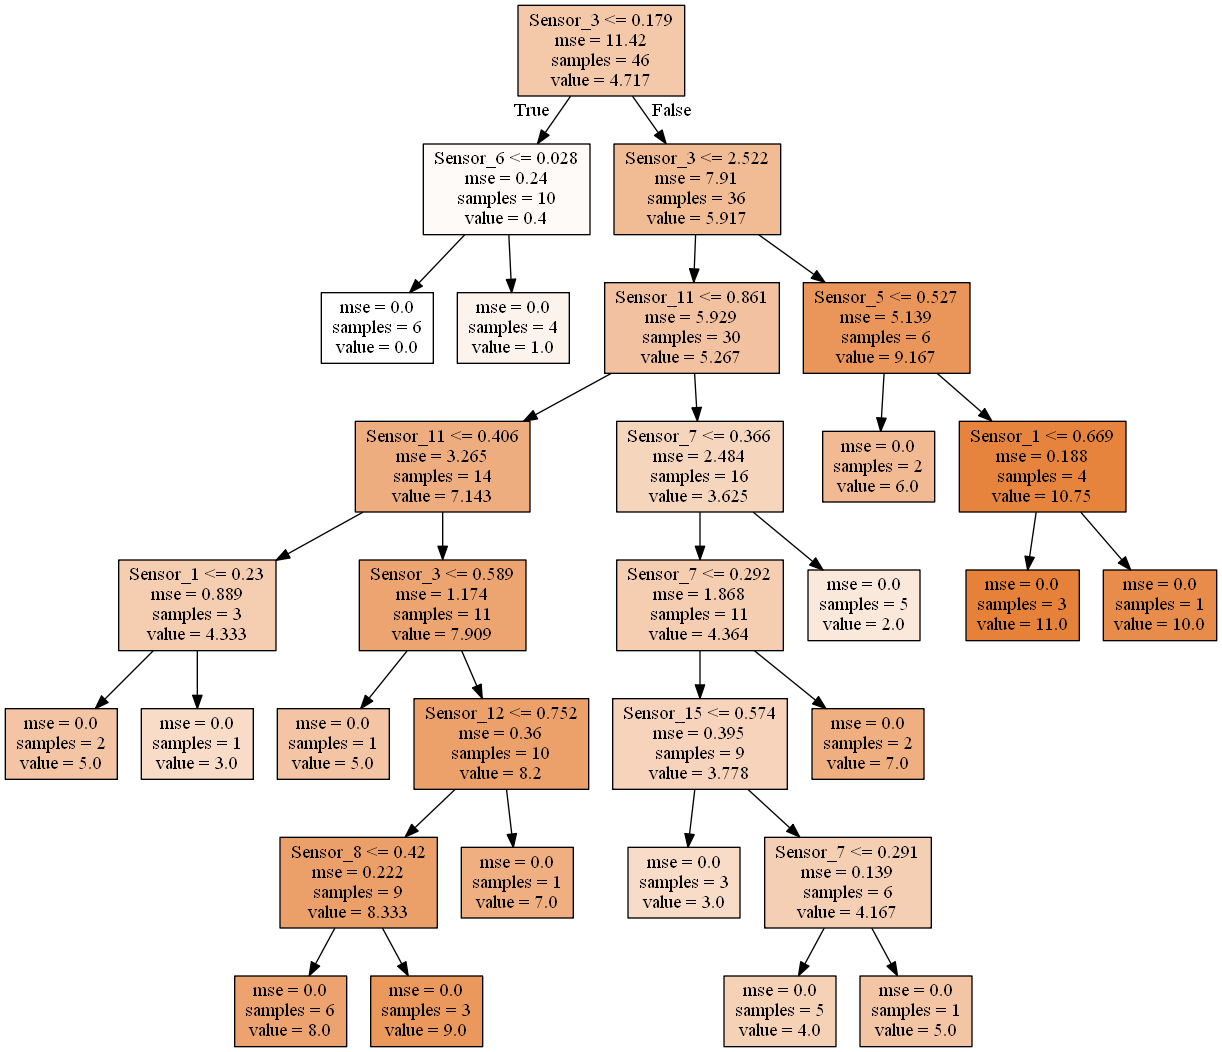

In [50]:
graph, = print_tree(tree,features=['Sensor_1','Sensor_2','Sensor_3','Sensor_4','Sensor_5','Sensor_6','Sensor_7','Sensor_8','Sensor_9','Sensor_10','Sensor_11','Sensor_12','Sensor_13','Sensor_14','Sensor_15','Sensor_16'])
Image(graph.create_png())

In [51]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
y_test

10     0
39     0
43     7
20     7
15     3
46     3
56    10
57    10
33     9
31     1
49     6
44     1
Name: gas_label, dtype: int64

In [52]:
cm = pd.DataFrame(confusion_matrix(y_test, tree_pred).T)
cm.columns.name = 'True'
cm.index.name = 'Pred'
cm

True,0,1,2,3,4,5,6,7,8
Pred,,,,,,,,,
0,2,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,2,0


In [53]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         0

   micro avg       0.67      0.67      0.67        12
   macro avg       0.56      0.50      0.52        12
weighted avg       0.75      0.67      0.69        12



C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hongru\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Hongru\Anaconda3\li

# Extra Credit

Instead of pridicting the gas class, now we want to predict the concentration of acetone and ethanol, and the problem turns into a regression problem. 

First of all we need to add the concentration results of both types of gas into our dataframe

In [54]:
ace_conc = dict()
eth_conc = dict()
for i in range(0,58):
    df_ace_conc = rawdata.loc[0+i*16, 'ace_conc']
    df_eth_conc = rawdata.loc[0+i*16, 'eth_conc']
    ace_conc[i]= df_ace_conc
    eth_conc[i]= df_eth_conc
    print(eth_conc[i])

0.0
0.1
1.0
0.0
0.1
0.3
0.0
0.3
0.0
0.0
0.0
0.1
0.1
0.3
0.1
0.0
0.0
1.0
0.0
0.0
0.3
0.0
0.3
0.1
0.1
0.1
1.0
0.0
0.0
0.0
0.0
0.1
0.3
0.1
0.0
0.1
1.0
0.0
1.0
0.0
0.0
0.3
0.1
0.3
0.1
0.1
0.0
0.1
1.0
0.0
0.0
0.1
0.3
0.0
0.1
0.1
1.0
1.0


In [55]:
ace_conc = pd.DataFrame.from_dict(ace_conc,orient='index',columns=['ace_conc'])
eth_conc = pd.DataFrame.from_dict(eth_conc,orient='index',columns=['eth_conc'])

New_output with concentration columns added

In [56]:
output['ace_conc'] = ace_conc.ace_conc
output['eth_conc'] = eth_conc.eth_conc
output.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,gas_class,gas_label,ace_conc,eth_conc
0,-0.00496,-0.00501,0.00014,-0.01115,-0.00518,-0.00403,-0.00351,-0.01070,-0.00722,-0.00656,-0.00124,-0.00891,-0.00756,-0.01055,-0.01020,-0.00573,air,0,0.0,0.0
1,0.09065,0.09705,0.08028,0.36909,0.11609,0.05655,0.08989,0.28845,0.22948,0.26933,0.25783,0.33725,0.22912,0.28227,0.31071,0.32001,eth-0.1,1,0.0,0.1
2,0.49140,0.55602,1.04731,1.94514,0.59456,0.24677,0.44350,1.45628,1.24420,1.97640,1.71870,1.82975,1.26106,1.47038,1.54872,2.02047,eth-1,2,0.0,1.0
3,0.14897,0.16397,1.41251,0.53573,0.17043,0.08986,0.14557,0.41419,0.32109,0.67576,1.18088,0.38818,0.32261,0.36250,0.36114,0.61682,ace-0.3,3,0.3,0.0
4,0.28416,0.32127,2.46322,1.09394,0.33277,0.16459,0.29007,0.83553,0.71973,1.29176,1.86560,0.96558,0.72318,0.82204,0.82992,1.20985,ace-0.3-eth-0.1,4,0.3,0.1


In [57]:
new_output = output
new_output.drop(new_output.index[[4,7,9,13,18]])

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,gas_class,gas_label,ace_conc,eth_conc
0,-0.00496,-0.00501,0.00014,-0.01115,-0.00518,-0.00403,-0.00351,-0.01070,-0.00722,-0.00656,-0.00124,-0.00891,-0.00756,-0.01055,-0.01020,-0.00573,air,0,0.0,0.0
1,0.09065,0.09705,0.08028,0.36909,0.11609,0.05655,0.08989,0.28845,0.22948,0.26933,0.25783,0.33725,0.22912,0.28227,0.31071,0.32001,eth-0.1,1,0.0,0.1
2,0.49140,0.55602,1.04731,1.94514,0.59456,0.24677,0.44350,1.45628,1.24420,1.97640,1.71870,1.82975,1.26106,1.47038,1.54872,2.02047,eth-1,2,0.0,1.0
3,0.14897,0.16397,1.41251,0.53573,0.17043,0.08986,0.14557,0.41419,0.32109,0.67576,1.18088,0.38818,0.32261,0.36250,0.36114,0.61682,ace-0.3,3,0.3,0.0
5,0.22167,0.24976,0.20001,0.71041,0.25726,0.14355,0.23430,0.56618,0.43454,0.51209,0.40343,0.54795,0.43947,0.46551,0.46404,0.59658,eth-0.3,5,0.0,0.3
6,0.36590,0.40523,3.69246,1.24647,0.42189,0.18286,0.33157,0.96022,0.89871,1.71038,2.38313,1.23174,0.89358,1.04326,1.02545,1.50932,ace-1,6,1.0,0.0
8,0.08219,0.09075,0.80688,0.28914,0.09561,0.05570,0.09988,0.22660,0.14196,0.25919,0.73339,0.17737,0.14582,0.16050,0.15995,0.25205,ace-0.1,8,0.1,0.0
10,0.00272,0.00527,0.08750,0.00000,0.00218,0.00860,0.02013,-0.00048,-0.02195,-0.01833,0.09755,-0.04137,-0.02114,-0.03935,-0.04793,-0.00595,air,0,0.0,0.0
11,0.07912,0.08578,0.14246,0.27974,0.09248,0.05256,0.09492,0.22076,0.13574,0.13979,0.29058,0.16670,0.13565,0.14603,0.15266,0.17592,eth-0.1,1,0.0,0.1
12,0.16800,0.18228,0.88411,0.58964,0.19566,0.09442,0.17166,0.46350,0.26953,0.40006,0.80185,0.31481,0.27296,0.27232,0.27655,0.43344,ace-0.1-eth-0.1,9,0.1,0.1


# Polynomial Regression model

Get the best polynomial fit for each sensor

In [58]:
for i in range(0,16):
    y = output.ace_conc.values
    X1 = PolynomialFeatures(1).fit_transform(Sensor_data.iloc[:,i].values.reshape(-1,1))
    X2 = PolynomialFeatures(2).fit_transform(Sensor_data.iloc[:,i].values.reshape(-1,1))
    X3 = PolynomialFeatures(3).fit_transform(Sensor_data.iloc[:,i].values.reshape(-1,1))
    X4 = PolynomialFeatures(4).fit_transform(Sensor_data.iloc[:,i].values.reshape(-1,1))
    X5 = PolynomialFeatures(5).fit_transform(Sensor_data.iloc[:,i].values.reshape(-1,1))
    fit_1 =  sm.GLS(y, X1).fit()
    fit_2 =  sm.GLS(y, X2).fit()
    fit_3 =  sm.GLS(y, X3).fit()
    fit_4 =  sm.GLS(y, X4).fit()
    fit_5 =  sm.GLS(y, X5).fit()
    print("Sensor_",i+1)
    print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1))
    print("\n")

C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountere

Sensor_ 1
   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0      56.0  4.221493      0.0       NaN       NaN       NaN
1      55.0  3.962977      1.0  0.258516  3.751744  0.057896
2      54.0  3.651041      1.0  0.311936  4.527003  0.037946
3      53.0  3.648877      1.0  0.002164  0.031403  0.860019
4      52.0  3.583093      1.0  0.065784  0.954699  0.333050


Sensor_ 2
   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0      56.0  4.229934      0.0       NaN       NaN       NaN
1      55.0  3.955803      1.0  0.274130  4.272900  0.043444
2      54.0  3.513318      1.0  0.442486  6.897077  0.011210
3      53.0  3.495384      1.0  0.017934  0.279538  0.599211
4      52.0  3.336090      1.0  0.159294  2.482934  0.121152


Sensor_ 3
   df_resid       ssr  df_diff   ss_diff          F    Pr(>F)
0      56.0  0.756497      0.0       NaN        NaN       NaN
1      55.0  0.650870      1.0  0.105627  14.295410  0.000387
2      54.0  0.449686      1.0  0.201184  27.227

C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Hongru\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

Add polynomial to the dataframe

In [59]:
new_output['Sensor_1_d2'] = new_output.Sensor_1**2
new_output['Sensor_1_d3'] = new_output.Sensor_1**3
new_output['Sensor_1_d4'] = new_output.Sensor_1**4

new_output['Sensor_2_d2'] = new_output.Sensor_2**2
new_output['Sensor_2_d3'] = new_output.Sensor_2**3
new_output['Sensor_2_d4'] = new_output.Sensor_2**4

new_output['Sensor_3_d2'] = new_output.Sensor_3**2
new_output['Sensor_3_d3'] = new_output.Sensor_3**3
new_output['Sensor_3_d4'] = new_output.Sensor_3**4

new_output['Sensor_4_d2'] = new_output.Sensor_4**2
new_output['Sensor_4_d3'] = new_output.Sensor_4**3
new_output['Sensor_4_d4'] = new_output.Sensor_4**4

new_output['Sensor_5_d2'] = new_output.Sensor_5**2
new_output['Sensor_5_d3'] = new_output.Sensor_5**3
new_output['Sensor_5_d4'] = new_output.Sensor_5**4

new_output['Sensor_6_d2'] = new_output.Sensor_6**2
new_output['Sensor_6_d3'] = new_output.Sensor_6**3
new_output['Sensor_6_d4'] = new_output.Sensor_6**4
new_output['Sensor_6_d4'] = new_output.Sensor_6**5

new_output['Sensor_7_d2'] = new_output.Sensor_7**2
new_output['Sensor_7_d3'] = new_output.Sensor_7**3
new_output['Sensor_7_d4'] = new_output.Sensor_7**4

new_output['Sensor_8_d2'] = new_output.Sensor_8**2
new_output['Sensor_8_d3'] = new_output.Sensor_8**3
new_output['Sensor_8_d4'] = new_output.Sensor_8**4

new_output['Sensor_9_d2'] = new_output.Sensor_9**2
new_output['Sensor_9_d3'] = new_output.Sensor_9**3

new_output['Sensor_10_d2'] = new_output.Sensor_10**2
new_output['Sensor_10_d3'] = new_output.Sensor_10**3


new_output['Sensor_11_d2'] = new_output.Sensor_11**2
new_output['Sensor_11_d3'] = new_output.Sensor_11**3

new_output['Sensor_12_d2'] = new_output.Sensor_12**2
new_output['Sensor_12_d3'] = new_output.Sensor_12**3

new_output['Sensor_13_d2'] = new_output.Sensor_13**2
new_output['Sensor_13_d3'] = new_output.Sensor_13**3

new_output['Sensor_14_d2'] = new_output.Sensor_14**2

new_output['Sensor_15_d2'] = new_output.Sensor_15**2
new_output['Sensor_15_d3'] = new_output.Sensor_15**3

new_output['Sensor_16_d2'] = new_output.Sensor_16**2
new_output['Sensor_16_d3'] = new_output.Sensor_16**3
new_output['Sensor_16_d4'] = new_output.Sensor_16**4
new_output.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_12_d2,Sensor_12_d3,Sensor_13_d2,Sensor_13_d3,Sensor_14_d2,Sensor_15_d2,Sensor_15_d3,Sensor_16_d2,Sensor_16_d3,Sensor_16_d4
0,-0.00496,-0.00501,0.00014,-0.01115,-0.00518,-0.00403,-0.00351,-0.01070,-0.00722,-0.00656,...,0.000079,-7.073480e-07,0.000057,-4.320812e-07,0.000111,0.000104,-0.000001,0.000033,-1.881325e-07,1.077999e-09
1,0.09065,0.09705,0.08028,0.36909,0.11609,0.05655,0.08989,0.28845,0.22948,0.26933,...,0.113738,3.835799e-02,0.052496,1.202788e-02,0.079676,0.096541,0.029996,0.102406,3.277107e-02,1.048707e-02
2,0.49140,0.55602,1.04731,1.94514,0.59456,0.24677,0.44350,1.45628,1.24420,1.97640,...,3.347985,6.125976e+00,1.590272,2.005429e+00,2.162017,2.398534,3.714657,4.082299,8.248163e+00,1.666517e+01
3,0.14897,0.16397,1.41251,0.53573,0.17043,0.08986,0.14557,0.41419,0.32109,0.67576,...,0.150684,5.849240e-02,0.104077,3.357635e-02,0.131406,0.130422,0.047101,0.380467,2.346796e-01,1.447551e-01
4,0.28416,0.32127,2.46322,1.09394,0.33277,0.16459,0.29007,0.83553,0.71973,1.29176,...,0.932345,9.002534e-01,0.522989,3.782154e-01,0.675750,0.688767,0.571622,1.463737,1.770902e+00,2.142526e+00


Train the polynomial model according to the acetone concentration

In [60]:
est_ace = smf.ols('ace_conc ~ Sensor_1 + Sensor_2 +Sensor_3 +Sensor_4 +Sensor_5 +Sensor_6 +Sensor_7 +Sensor_8 +Sensor_9 +Sensor_10 +Sensor_11 +Sensor_12+ Sensor_13 +Sensor_14 +Sensor_15 +Sensor_16 + Sensor_1_d2+ Sensor_1_d3+ Sensor_1_d4 +Sensor_2_d2 +Sensor_2_d3 +Sensor_2_d4+ Sensor_3_d2 +Sensor_3_d3 +Sensor_3_d4 +Sensor_4_d2 +Sensor_4_d3 +Sensor_4_d4+ Sensor_5_d2 +Sensor_5_d3 +Sensor_5_d4 +Sensor_6_d2 +Sensor_6_d3 +Sensor_6_d4 +Sensor_7_d2 +Sensor_7_d3 +Sensor_7_d4+ Sensor_8_d2 +Sensor_8_d3 +Sensor_8_d4+ Sensor_9_d2 +Sensor_9_d3 +Sensor_10_d2 +Sensor_10_d3 +Sensor_11_d2 +Sensor_11_d3 +Sensor_12_d2 +Sensor_12_d3 +Sensor_13_d2 +Sensor_13_d3 +Sensor_14_d2 +Sensor_15_d2 +Sensor_15_d3 +Sensor_16_d2 +Sensor_16_d3 +Sensor_16_d4', new_output).fit()
est_ace.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ace_conc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.624e+04
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00288
Time:                        22:48:23   Log-Likelihood:                 431.26
No. Observations:                  58   AIC:                            -748.5
Df Residuals:                       1   BIC:                            -631.1
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0207      0.002    -10.151      0.063      -0.047       0.005
Sensor_1        -6.1485      0.933     -6.591      0.096     -18.001       5.704
Sensor_2       -25.2110      1.741    -14.481      0.044     -47.332      -3.090
Sensor_3         0.2931      0.047      6.227      0.101      -0.305       0.891
Sensor_4         7.3695      1.593      4.627      0.135     -12.867      27.606
Sensor_5        26.3074      1.552     16.955      0.038       6.592      46.023
Sensor_6         0.6829      0.800      0.854      0.550      -9.482      10.848
Sensor_7         9.2522      0.872     10.606      0.060      -1.832      20.337
Sensor_8       -11.7983      1.994     -5.915      0.107     -37.141      13.544
Sensor_9       -12.9130      0.693    -18.640      0.034     -21.715      -4.111
Sensor_10        3.4227      0.330     10.380      0.061      -0.767       7.613
Sensor_11       -1.3529      0.107    -12.599      0.050      -2.717       0.012
Sensor_12        1.6352      0.343      4.765      0.132      -2.725       5.995
Sensor_13       13.3863      0.621     21.566      0.029       5.499      21.273
Sensor_14        4.0735      0.453      9.000      0.070      -1.678       9.825
Sensor_15       -5.0992      0.477    -10.701      0.059     -11.154       0.955
Sensor_16       -4.2921      0.613     -7.001      0.090     -12.082       3.498
Sensor_1_d2    101.0065     12.317      8.201      0.077     -55.493     257.506
Sensor_1_d3     56.1222     58.167      0.965      0.511    -682.954     795.198
Sensor_1_d4   -707.8328     82.959     -8.532      0.074   -1761.928     346.262
Sensor_2_d2     79.7020      9.983      7.983      0.079     -47.150     206.554
Sensor_2_d3    -58.1308     20.111     -2.890      0.212    -313.666     197.404
Sensor_2_d4     62.5875     15.241      4.107      0.152    -131.063     256.238
Sensor_3_d2     -0.2098      0.044     -4.763      0.132      -0.770       0.350
Sensor_3_d3      0.1536      0.017      9.088      0.070      -0.061       0.368
Sensor_3_d4     -0.0217      0.002    -11.981      0.053      -0.045       0.001
Sensor_4_d2      4.3714      1.415      3.090      0.199     -13.602      22.345
Sensor_4_d3     -5.0260      0.987     -5.094      0.123     -17.563       7.511
Sensor_4_d4      0.3680      0.336      1.095      0.471      -3.904       4.640
Sensor_5_d2   -226.8906      6.680    -33.967      0.019    -311.766    -142.016
Sensor_5_d3    387.5694     16.468     23.534      0.027     178.318     596.821
Sensor_5_d4    -27.6624     23.163     -1.194      0.444    -321.972     266.648
Sensor_6_d2     76.4566      6.598     11.588      0.055      -7.375     160.289
Sensor_6_d3   -677.1042     23.655    -28.624      0.022    -977.670    -376.539
Sensor_6_d4   1371.4751     57.107     24.016      0.026     645.857    2097.093
Senso

Get the predict concentration and compare with test set ,plot and calculate the MSE

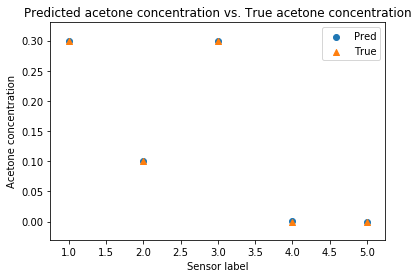

In [61]:
ace_conc_pred_1 = est_ace.predict(output[4:5])
ace_conc_pred_2 = est_ace.predict(output[7:8])
ace_conc_pred_3 = est_ace.predict(output[9:10])
ace_conc_pred_4 = est_ace.predict(output[13:14])
ace_conc_pred_5 = est_ace.predict(output[18:19])

ace_conc_pred = np.array([ace_conc_pred_1.values,ace_conc_pred_2.values,ace_conc_pred_3.values,ace_conc_pred_4.values,ace_conc_pred_5.values])
ace_conc_pred = np.ravel(ace_conc_pred)
ace_conc_true = np.array([0.3, 0.1, 0.3, 0, 0])
ace_mse = mean_squared_error(ace_conc_true, ace_conc_pred)

x = np.array([1,2,3,4,5])
plt.scatter(x,ace_conc_pred,label="Pred");
plt.scatter(x,ace_conc_true,marker='^',label="True");
plt.title('Predicted acetone concentration vs. True acetone concentration');
plt.xlabel('Sensor label');
plt.ylabel('Acetone concentration');
plt.legend();


In [62]:
print("The MSE of predict ace_conc is:",ace_mse)

The MSE of predict ace_conc is: 1.1031591361082394e-08


Train the polynomial model according to the ethanol concentration

In [63]:
est_eth = smf.ols('eth_conc ~ Sensor_1 + Sensor_2 +Sensor_3 +Sensor_4 +Sensor_5 +Sensor_6 +Sensor_7 +Sensor_8 +Sensor_9 +Sensor_10 +Sensor_11 +Sensor_12+ Sensor_13 +Sensor_14 +Sensor_15 +Sensor_16 + Sensor_1_d2+ Sensor_1_d3+ Sensor_1_d4 +Sensor_2_d2 +Sensor_2_d3 +Sensor_2_d4+ Sensor_3_d2 +Sensor_3_d3 +Sensor_3_d4 +Sensor_4_d2 +Sensor_4_d3 +Sensor_4_d4+ Sensor_5_d2 +Sensor_5_d3 +Sensor_5_d4 +Sensor_6_d2 +Sensor_6_d3 +Sensor_6_d4 +Sensor_7_d2 +Sensor_7_d3 +Sensor_7_d4+ Sensor_8_d2 +Sensor_8_d3 +Sensor_8_d4+ Sensor_9_d2 +Sensor_9_d3 +Sensor_10_d2 +Sensor_10_d3 +Sensor_11_d2 +Sensor_11_d3 +Sensor_12_d2 +Sensor_12_d3 +Sensor_13_d2 +Sensor_13_d3 +Sensor_14_d2 +Sensor_15_d2 +Sensor_15_d3 +Sensor_16_d2 +Sensor_16_d3 +Sensor_16_d4', new_output).fit()
est_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               eth_conc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 15 May 2019   Prob (F-statistic):             0.0725
Time:                        22:48:24   Log-Likelihood:                 237.62
No. Observations:                  58   AIC:                            -361.2
Df Residuals:                       1   BIC:                            -243.8
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1376      0.057      2.397      0.252      -0.592       0.867
Sensor_1        32.5296     26.288      1.237      0.433    -301.491     366.550
Sensor_2       101.9944     49.065      2.079      0.285    -521.431     725.420
Sensor_3        -3.2865      1.327     -2.477      0.244     -20.143      13.570
Sensor_4       -94.5788     44.885     -2.107      0.282    -664.894     475.736
Sensor_5       -94.6659     43.728     -2.165      0.275    -650.283     460.951
Sensor_6       -31.1490     22.546     -1.382      0.399    -317.622     255.324
Sensor_7       -38.3873     24.585     -1.561      0.363    -350.770     273.995
Sensor_8       118.9190     56.209      2.116      0.281    -595.279     833.117
Sensor_9        29.9488     19.524      1.534      0.368    -218.121     278.019
Sensor_10      -15.0974      9.293     -1.625      0.351    -133.178     102.983
Sensor_11        5.7880      3.026      1.913      0.307     -32.665      44.241
Sensor_12      -15.5697      9.671     -1.610      0.354    -138.449     107.309
Sensor_13      -22.4889     17.493     -1.286      0.421    -244.759     199.781
Sensor_14      -29.5196     12.756     -2.314      0.260    -191.596     132.557
Sensor_15       28.9119     13.429      2.153      0.277    -141.723     199.546
Sensor_16       33.6116     17.278      1.945      0.302    -185.930     253.153
Sensor_1_d2    604.0242    347.112      1.740      0.332   -3806.453    5014.501
Sensor_1_d3  -3340.3914   1639.254     -2.038      0.290   -2.42e+04    1.75e+04
Sensor_1_d4   4821.5794   2337.960      2.062      0.287   -2.49e+04    3.45e+04
Sensor_2_d2   -658.1382    281.355     -2.339      0.257   -4233.088    2916.812
Sensor_2_d3   1391.2403    566.771      2.455      0.246   -5810.262    8592.743
Sensor_2_d4  -1065.8356    429.513     -2.481      0.244   -6523.315    4391.644
Sensor_3_d2      2.9822      1.242      2.402      0.251     -12.793      18.758
Sensor_3_d3     -1.1293      0.476     -2.371      0.254      -7.182       4.924
Sensor_3_d4      0.1207      0.051      2.363      0.255      -0.528       0.770
Sensor_4_d2     87.1031     39.865      2.185      0.273    -419.424     593.630
Sensor_4_d3    -34.7640     27.808     -1.250      0.430    -388.094     318.566
Sensor_4_d4      1.8382      9.474      0.194      0.878    -118.547     122.223
Sensor_5_d2    160.4406    188.251      0.852      0.551   -2231.511    2552.392
Sensor_5_d3    444.3148    464.116      0.957      0.514   -5452.833    6341.462
Sensor_5_d4  -1059.7953    652.773     -1.624      0.351   -9354.062    7234.472
Sensor_6_d2    154.9637    185.938      0.833      0.558   -2207.599    2517.526
Sensor_6_d3    427.0056    666.647      0.641      0.637   -8043.552    8897.563
Sensor_6_d4     -6.3359   1609.404     -0.004      0.997   -2.05e+04    2.04e+04
Senso

Get the predict concentration and compare with test set ,plot and calculate the MSE

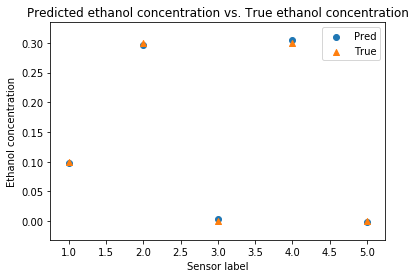

In [64]:
eth_conc_pred_1 = est_eth.predict(output[4:5])
eth_conc_pred_2 = est_eth.predict(output[7:8])
eth_conc_pred_3 = est_eth.predict(output[9:10])
eth_conc_pred_4 = est_eth.predict(output[13:14])
eth_conc_pred_5 = est_eth.predict(output[18:19])

eth_conc_pred = np.array([eth_conc_pred_1.values,eth_conc_pred_2.values,eth_conc_pred_3.values,eth_conc_pred_4.values,eth_conc_pred_5.values])
eth_conc_pred = np.ravel(eth_conc_pred)
eth_conc_true = np.array([0.1, 0.3, 0, 0.3, 0])
eth_mse = mean_squared_error(eth_conc_true, eth_conc_pred)

x = np.array([1,2,3,4,5])

plt.scatter(x,eth_conc_pred,label="Pred");
plt.scatter(x,eth_conc_true,marker='^',label="True");
plt.title('Predicted ethanol concentration vs. True ethanol concentration');
plt.xlabel('Sensor label');
plt.ylabel('Ethanol concentration');
plt.legend();

In [65]:
print("The MSE of predict eth_conc is:",eth_mse)

The MSE of predict eth_conc is: 8.761615369657113e-06


# Ridge and RidgeCV Regression Model

In [66]:
# create new training and testing sets
Result = output['ace_conc']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(Sensor_data, Result, test_size=0.2)
print (X_train_new.shape, y_train_new.shape)
print (X_test_new.shape, y_test_new.shape)
y_test_new

(46, 16) (46,)
(12, 16) (12,)


46    0.3
51    0.0
34    0.3
27    1.0
6     1.0
23    0.0
5     0.0
40    0.1
1     0.0
21    0.1
19    0.0
57    0.1
Name: ace_conc, dtype: float64

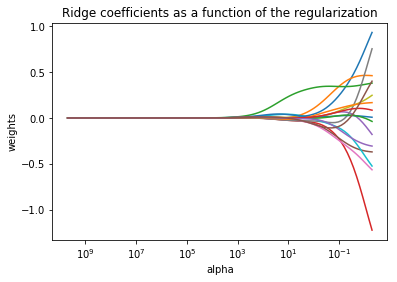

In [67]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(Sensor_data), Result)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_new)

In [69]:
ridge2 = Ridge(alpha=len(Sensor_data)*11498/2)
ridge2.fit(scaler.transform(X_train_new), y_train_new)
pred = ridge2.predict(scaler.transform(X_test_new))
mean_squared_error(y_test_new, pred)

0.12966655575077968

In [70]:
pd.Series(ridge2.coef_.flatten(), index=Sensor_data.columns)

Sensor_1     0.000016
Sensor_2     0.000015
Sensor_3     0.000035
Sensor_4     0.000014
Sensor_5     0.000015
Sensor_6     0.000014
Sensor_7     0.000014
Sensor_8     0.000014
Sensor_9     0.000017
Sensor_10    0.000021
Sensor_11    0.000019
Sensor_12    0.000014
Sensor_13    0.000016
Sensor_14    0.000016
Sensor_15    0.000016
Sensor_16    0.000017
dtype: float64

In [71]:
ridge2.set_params(alpha=10**10)
ridge2.fit(scale(X_train_new), y_train_new)
pred = ridge2.predict(scale(X_test_new))
mean_squared_error(y_test_new, pred)

0.12978417986206253

MSE for the Ridge model is 0.18875708441523487

In [72]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train_new), y_train_new)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [73]:
ridgecv.alpha_

0.3289666123287841

In [74]:
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X_train_new), y_train_new)
mean_squared_error(y_test_new, ridge2.predict(scale(X_test_new)))

0.022580790406880005

MSE for the RidgeCV model is 0.06045102408409365

In [75]:
pd.Series(ridge2.coef_.flatten(), index=Sensor_data.columns)

Sensor_1     0.084514
Sensor_2     0.156427
Sensor_3     0.338444
Sensor_4    -0.024167
Sensor_5     0.039193
Sensor_6    -0.125040
Sensor_7    -0.092431
Sensor_8    -0.004607
Sensor_9    -0.020494
Sensor_10   -0.020654
Sensor_11   -0.031653
Sensor_12    0.003617
Sensor_13   -0.013821
Sensor_14   -0.007548
Sensor_15    0.010516
Sensor_16   -0.079461
dtype: float64

# Lasso Regression Model

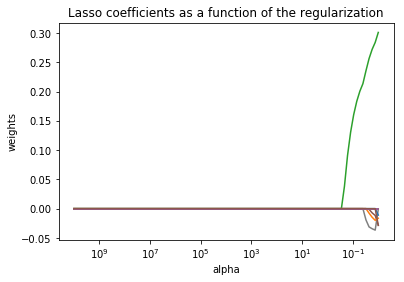

In [76]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train_new), y_train_new)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [77]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train_new), y_train_new.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [78]:
lassocv.alpha_

0.0007751995012193567

In [79]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train_new), y_train_new)
mean_squared_error(y_test_new, lasso.predict(scale(X_test_new)))

0.021918516698915938

MSE for the Lasso model is 0.06243914196253513

In [80]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=Sensor_data.columns)

Sensor_1     0.000000
Sensor_2     0.190686
Sensor_3     0.345000
Sensor_4    -0.000000
Sensor_5     0.000000
Sensor_6    -0.126164
Sensor_7    -0.032066
Sensor_8    -0.000000
Sensor_9    -0.000000
Sensor_10   -0.000000
Sensor_11   -0.040848
Sensor_12   -0.000000
Sensor_13   -0.000000
Sensor_14   -0.000000
Sensor_15   -0.000000
Sensor_16   -0.122969
dtype: float64